<a href="https://colab.research.google.com/github/ValdazoAmerico/kmeans-clustering/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from pandas import DataFrame

a = np.arange(100)
b = np.arange(100) * (-2)
df = DataFrame({'a':a, 'b':b})
df.head()

,a,b
0,0,0
1,1,-2
2,2,-4
3,3,-6
4,4,-8


In [4]:
df.describe()

,a,b
count,100.000000,100.000000
mean,49.500000,-99.000000
std,29.011492,58.022984
min,0.000000,-198.000000
25%,24.750000,-148.500000
50%,49.500000,-99.000000
75%,74.250000,-49.500000
max,99.000000,0.000000


In [5]:
df.corr()

,a,b
a,1.0,-1.0
b,-1.0,1.0


In [6]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()

In [7]:
housing = DataFrame(housing_data.data, columns=housing_data.feature_names)
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
corr = housing.corr()

In [14]:
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [13]:
corr['MedInc']['AveRooms']

0.32689543164129486

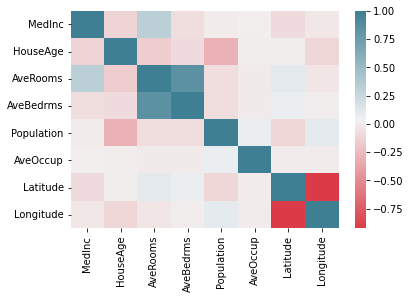

In [16]:
import seaborn as sns

cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, cmap=cmap)

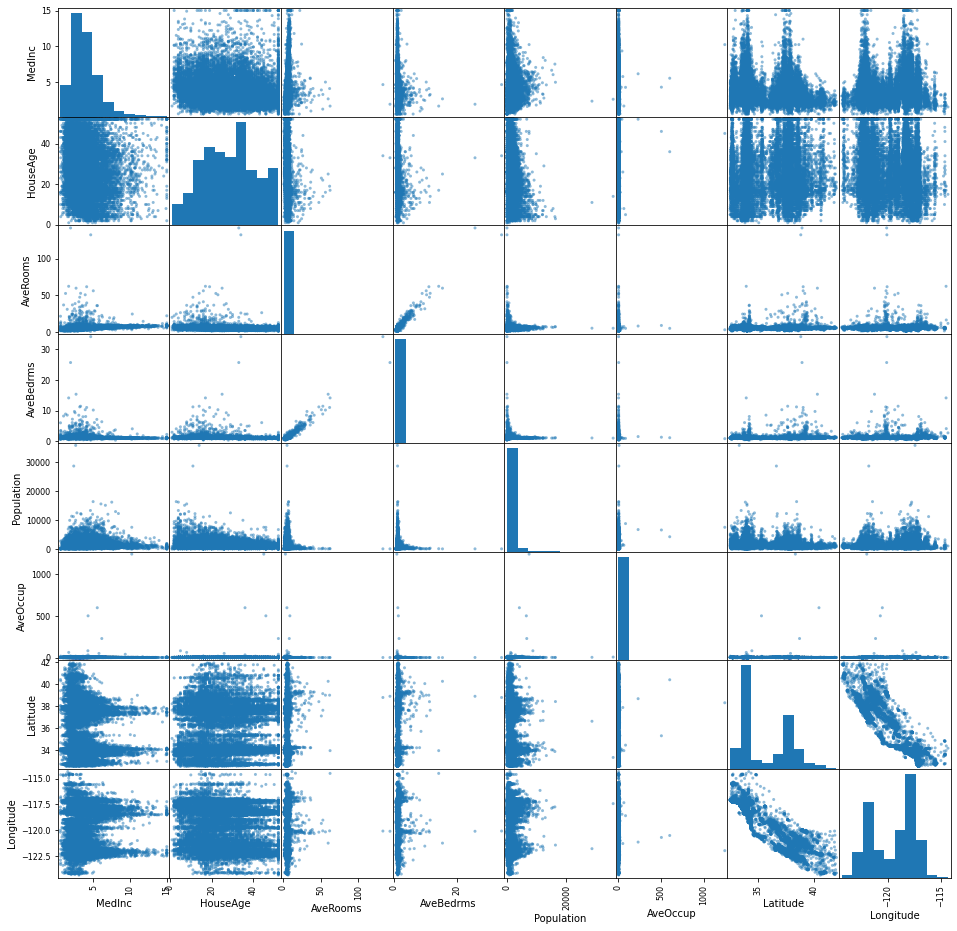

In [17]:
from pandas.plotting import scatter_matrix

a = scatter_matrix(housing, figsize=(16, 16))

In [34]:
from sklearn.datasets import make_blobs

data, true_labels = make_blobs(n_samples=500,centers=4, random_state=4)

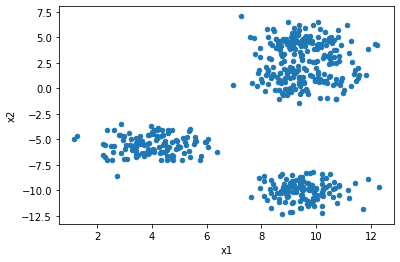

In [35]:
from pandas import DataFrame

points = DataFrame()

points = DataFrame(data, columns=['x1', 'x2'])
points.plot.scatter('x1', 'x2')

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(points)

In [41]:
cluster_centers = DataFrame(kmeans.cluster_centers_, columns=['x1','x2'])
cluster_centers

,x1,x2
0,9.544260,-10.027099
1,9.553161,4.371345
2,4.037597,-5.560169
3,9.484700,0.873686


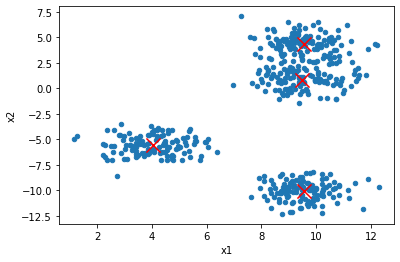

In [42]:
ax = points.plot.scatter('x1', 'x2')
cluster_centers.plot.scatter('x1', 'x2', ax=ax, c='red', s=200, marker='x')

In [39]:
kmeans.labels_

array([0, 1, 3, 1, 3, 2, 3, 2, 1, 0, 2, 3, 0, 1, 0, 3, 1, 2, 1, 2, 0, 0,
       2, 2, 2, 3, 0, 1, 3, 2, 1, 0, 0, 1, 0, 2, 0, 1, 3, 2, 3, 0, 1, 1,
       0, 2, 1, 1, 2, 1, 2, 3, 0, 2, 2, 0, 2, 3, 0, 2, 0, 3, 3, 1, 3, 2,
       1, 2, 3, 3, 1, 2, 3, 3, 0, 0, 1, 0, 1, 1, 3, 0, 3, 2, 2, 3, 2, 0,
       1, 1, 0, 1, 1, 2, 2, 3, 0, 0, 1, 3, 0, 1, 3, 3, 1, 2, 2, 2, 0, 3,
       2, 1, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, 2, 3, 2, 0, 1, 0, 1, 0, 2, 1,
       1, 0, 0, 3, 1, 3, 2, 2, 1, 0, 3, 3, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0,
       2, 2, 0, 3, 3, 3, 2, 3, 2, 0, 0, 2, 2, 2, 3, 2, 2, 0, 0, 2, 2, 1,
       2, 2, 1, 3, 3, 0, 3, 3, 3, 1, 2, 1, 2, 3, 0, 3, 2, 2, 1, 0, 0, 1,
       1, 1, 0, 3, 0, 3, 0, 1, 3, 0, 3, 1, 2, 2, 2, 1, 1, 0, 2, 3, 0, 1,
       0, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 3, 1, 3, 0, 2, 1, 1, 0, 0, 1, 3,
       3, 2, 3, 1, 0, 3, 1, 1, 1, 3, 3, 3, 3, 0, 2, 0, 3, 0, 3, 2, 1, 1,
       0, 3, 3, 0, 1, 3, 2, 2, 2, 2, 2, 0, 3, 0, 2, 3, 2, 3, 1, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 2, 1, 1, 3, 2, 0, 1, 2, 0,

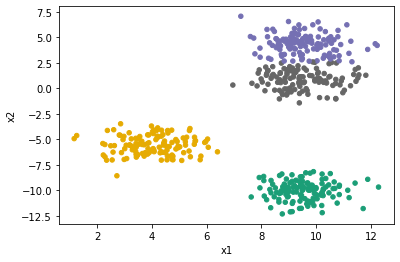

In [43]:
points.plot.scatter('x1', 'x2', c=kmeans.labels_, colormap='Dark2', colorbar=False)

In [44]:
from sklearn.datasets import load_iris

iris = DataFrame(load_iris().data, columns=load_iris().feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [45]:
num_iris_species = len(load_iris().target_names)
num_iris_species

3

In [46]:
kmeans = KMeans(n_clusters=num_iris_species).fit(iris)

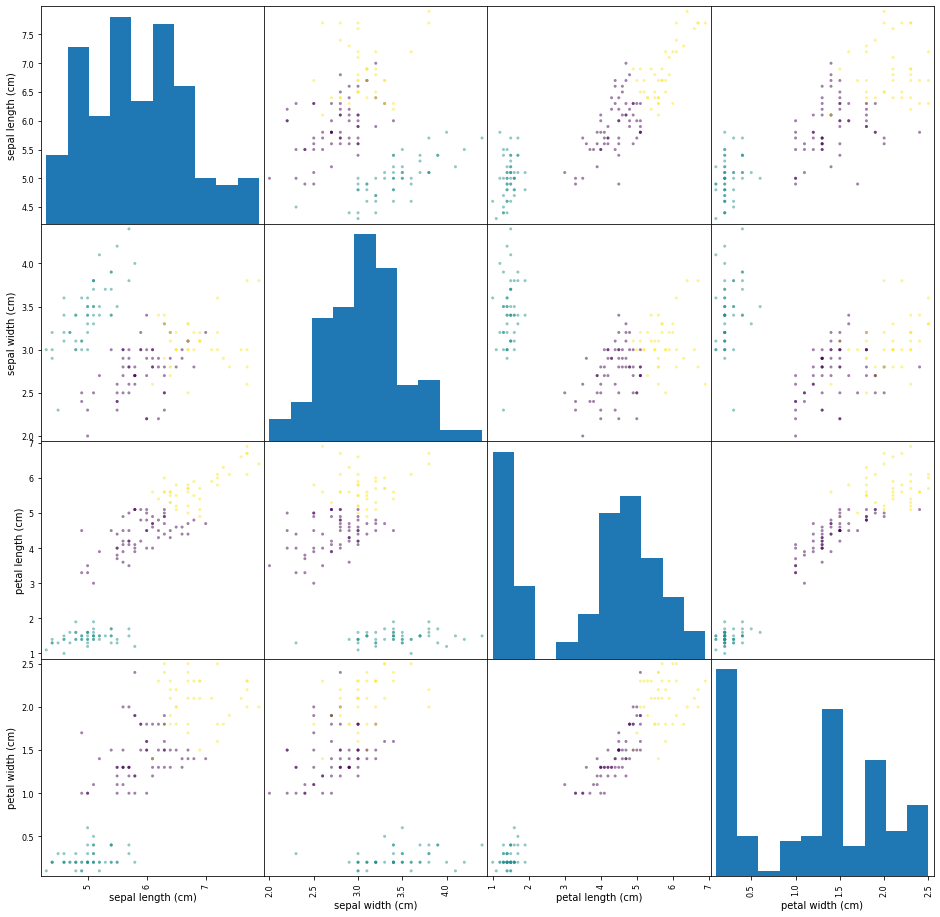

In [48]:
a = scatter_matrix(iris, figsize=(16, 16), c=kmeans.labels_)

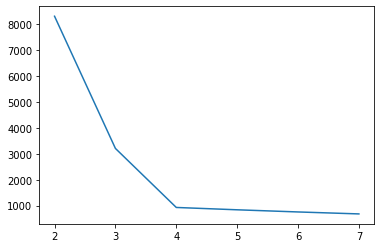

In [49]:
from pandas import Series, DataFrame
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

data, true_labels = make_blobs(n_samples=500, centers=4, random_state=6)
points = DataFrame(data, columns=['x', 'y'])

inertia_values = []
r = pd.RangeIndex(2,8)
for n_clusters in r:
  kmeans = KMeans(n_clusters=n_clusters).fit(points)
  inertia_values.append(kmeans.inertia_)

inertia = Series(inertia_values, name='inertia', index=r)
inertia.plot()